In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
%matplotlib inline
%run "C:\Users\anasofiaccruz\Desktop\cingulate_silencing_repo\data_prep_functions.ipynb"
%run "C:\Users\anasofiaccruz\Desktop\cingulate_silencing_repo\data_analysis_functions.ipynb"

#### <font color='darkorange'> Read the data (test runs below 15 seconds)

In [3]:
file_path = "C:/Users/anasofiaccruz/Desktop/Optogenetics processed data/below15_runs.csv"
below15 = pd.read_csv(file_path)

#### <font color='darkorange'> Remove baseline trials

In [4]:
below15 = below15[(below15['stim_condition']!=-1)]
below15['stim_condition'].unique()

array([1, 3, 0], dtype=int64)

#### <font color='darkorange'>Calculation of time spent in choice point

In [5]:
below15['time_in_cp'] = below15['latency_to_cp_exit']-below15['latency_to_cp_entry']
# Drop runs with time in cp below zero (only 6 runs, from the same rat and session)
below15 = below15[below15['time_in_cp']>=0]
below15.groupby(['group','stim_condition'])['time_in_cp'].count()

group  stim_condition
CTRL   0                  954
       1                  808
       3                  937
NPHR   0                 1195
       1                 1190
       3                 1161
Name: time_in_cp, dtype: int64

### <font color='darkorange'> Time in cp vs latency to cp entry
##### Because we remove runs with a latency to cp exit below 15 seconds, it is expected that runs with a higher value of latency to cp entry must low time in cp.

<Figure size 1800x1200 with 0 Axes>

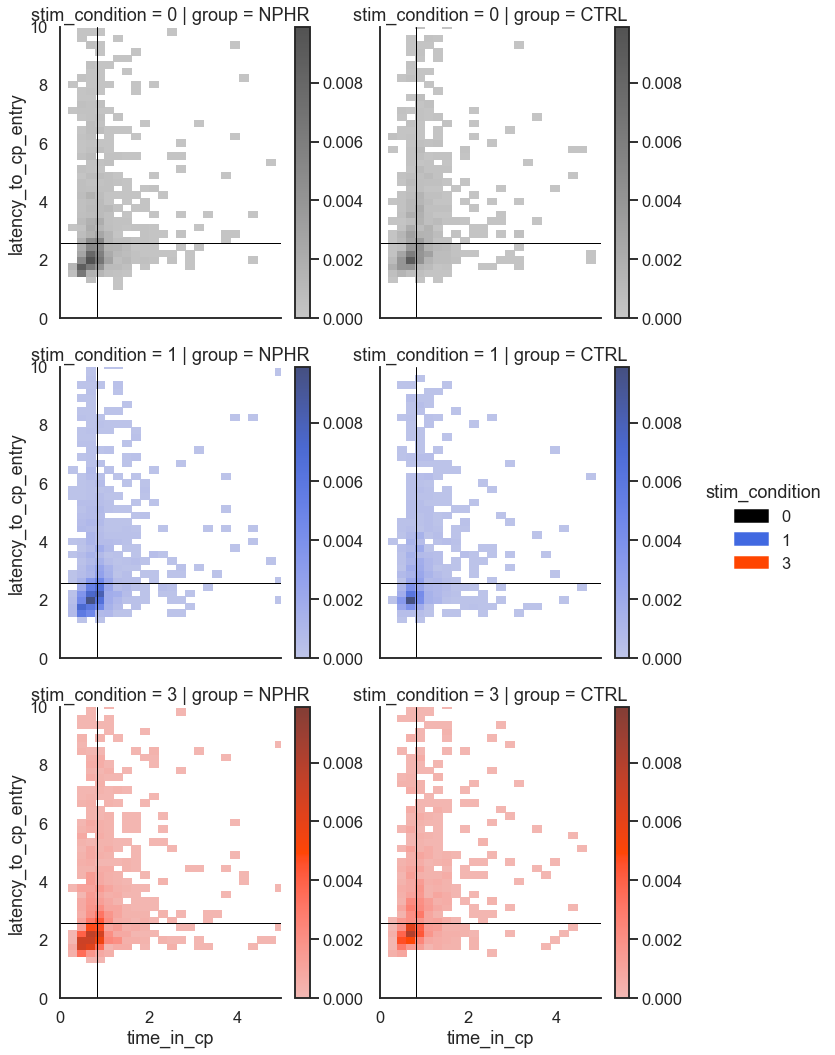

In [19]:
plt.figure(dpi=300)
g = sns.displot(kind='hist', data=below15, col='group', row='stim_condition',
            x='time_in_cp', y='latency_to_cp_entry', bins=60, hue='stim_condition',
            cbar=True, pmax=.5, palette=['black', 'royalblue','orangered'],
            stat='probability', height=5, aspect=1)
ax = g.axes.flatten()
for group, ax in g.axes_dict.items():
    ax.axvline(np.median(below15['time_in_cp']), color='black', linewidth=1)
    ax.axhline(np.median(below15['latency_to_cp_entry']), color='black', linewidth=1)
g.set(xlim=[0,5], ylim=[0,10])

### <font color='darkorange'> Time in cp vs latency to cp entry in error vs. correct trials
##### Because we remove runs with a latency to cp exit below 15 seconds, it is expected that runs with a higher value of latency to cp entry must low time in cp.

In [7]:
errors = below15[below15['outcome']==0]
corrects = below15[below15['outcome']==1]

<Figure size 1800x1200 with 0 Axes>

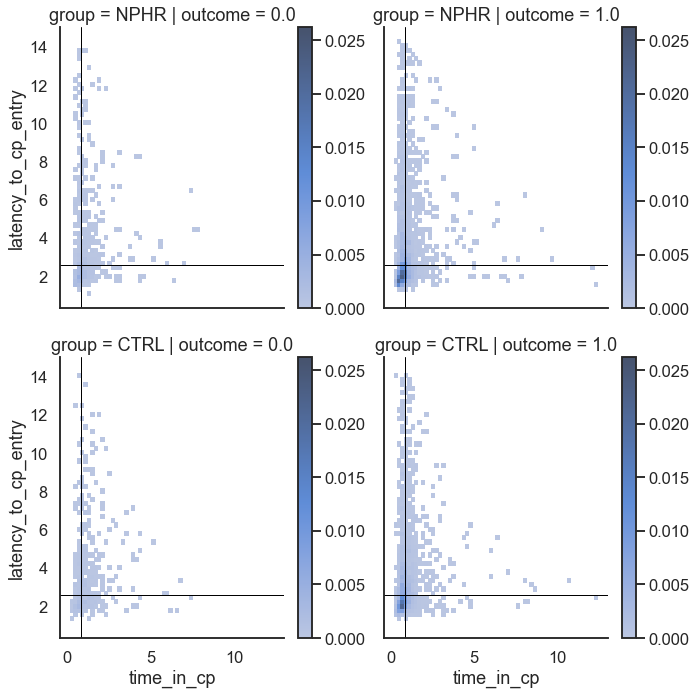

In [17]:
plt.figure(dpi=300)
sns.set(style='white', context='talk')
g = sns.displot(kind='hist', data=below15, col='outcome', row='group',
            x='time_in_cp', y='latency_to_cp_entry', bins=60, 
            cbar=True, stat='probability', pmax=.8,height=5)

ax = g.axes.flatten()
for group, ax in g.axes_dict.items():
    ax.axvline(np.median(below15['time_in_cp']), color='black', linewidth=1)
    ax.axhline(np.median(below15['latency_to_cp_entry']), color='black', linewidth=1)
#g.set(xlim=[0,5], ylim=[0,15])

<Figure size 1800x1200 with 0 Axes>

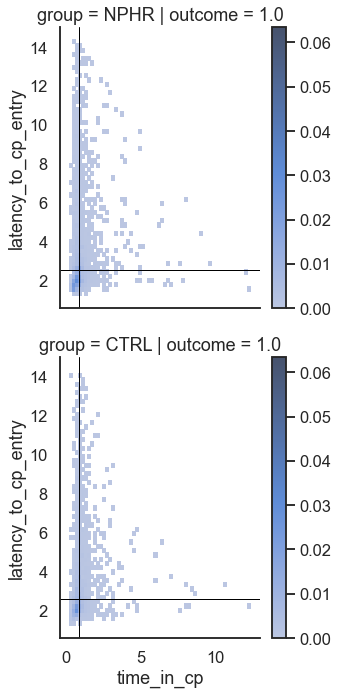

In [14]:
plt.figure(dpi=300)
sns.set(style='white', context='talk')
g = sns.displot(kind='hist', data=corrects, col='outcome', row='group',
            x='time_in_cp', y='latency_to_cp_entry', bins=60, 
            cbar=True, #pmax=.5,
            stat='probability', height=5)

ax = g.axes.flatten()
for group, ax in g.axes_dict.items():
    ax.axvline(np.median(below15['time_in_cp']), color='black', linewidth=1)
    ax.axhline(np.median(below15['latency_to_cp_entry']), color='black', linewidth=1)
#g.set(xlim=[0,5], ylim=[0,10])
sns.despine()